# Init

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import optimizers
from keras import regularizers
from google.colab.patches import cv2_imshow
import random
import matplotlib.pyplot as plt
import os

# Shallow Water Image Enhancement

## Load Data

In [ ]:
dirt=[]
clear=[]

In [ ]:
a=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainA'))
a.sort()
print(a)

['im_f1000_.jpg', 'im_f1001_.jpg', 'im_f1002_.jpg', 'im_f1003_.jpg', 'im_f1004_.jpg', 'im_f1005_.jpg', 'im_f1007_.jpg', 'im_f1009_.jpg', 'im_f100_.jpg', 'im_f1011_.jpg', 'im_f1012_.jpg', 'im_f1013_.jpg', 'im_f1015_.jpg', 'im_f1018_.jpg', 'im_f101_.jpg', 'im_f1022_.jpg', 'im_f1026_.jpg', 'im_f1027_.jpg', 'im_f1029_.jpg', 'im_f1033_.jpg', 'im_f1034_.jpg', 'im_f1035_.jpg', 'im_f1036_.jpg', 'im_f1037_.jpg', 'im_f1038_.jpg', 'im_f103_.jpg', 'im_f1041_.jpg', 'im_f1042_.jpg', 'im_f1043_.jpg', 'im_f1048_.jpg', 'im_f1049_.jpg', 'im_f104_.jpg', 'im_f1050_.jpg', 'im_f1051_.jpg', 'im_f1054_.jpg', 'im_f1056_.jpg', 'im_f1057_.jpg', 'im_f1058_.jpg', 'im_f1059_.jpg', 'im_f1060_.jpg', 'im_f1061_.jpg', 'im_f1062_.jpg', 'im_f1064_.jpg', 'im_f1065_.jpg', 'im_f1069_.jpg', 'im_f1071_.jpg', 'im_f1072_.jpg', 'im_f1079_.jpg', 'im_f107_.jpg', 'im_f1083_.jpg', 'im_f1085_.jpg', 'im_f1087_.jpg', 'im_f108_.jpg', 'im_f1093_.jpg', 'im_f1098_.jpg', 'im_f1099_.jpg', 'im_f109_.jpg', 'im_f10_.jpg', 'im_f1101_.jpg', 'im_f

In [ ]:
b=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainB'))
b.sort()
print(b)

['im_f1000_.jpg', 'im_f1001_.jpg', 'im_f1002_.jpg', 'im_f1003_.jpg', 'im_f1004_.jpg', 'im_f1005_.jpg', 'im_f1007_.jpg', 'im_f1009_.jpg', 'im_f100_.jpg', 'im_f1011_.jpg', 'im_f1012_.jpg', 'im_f1013_.jpg', 'im_f1015_.jpg', 'im_f1018_.jpg', 'im_f101_.jpg', 'im_f1022_.jpg', 'im_f1026_.jpg', 'im_f1027_.jpg', 'im_f1029_.jpg', 'im_f1033_.jpg', 'im_f1034_.jpg', 'im_f1035_.jpg', 'im_f1036_.jpg', 'im_f1037_.jpg', 'im_f1038_.jpg', 'im_f103_.jpg', 'im_f1041_.jpg', 'im_f1042_.jpg', 'im_f1043_.jpg', 'im_f1048_.jpg', 'im_f1049_.jpg', 'im_f104_.jpg', 'im_f1050_.jpg', 'im_f1051_.jpg', 'im_f1054_.jpg', 'im_f1056_.jpg', 'im_f1057_.jpg', 'im_f1058_.jpg', 'im_f1059_.jpg', 'im_f1060_.jpg', 'im_f1061_.jpg', 'im_f1062_.jpg', 'im_f1064_.jpg', 'im_f1065_.jpg', 'im_f1069_.jpg', 'im_f1071_.jpg', 'im_f1072_.jpg', 'im_f1079_.jpg', 'im_f107_.jpg', 'im_f1083_.jpg', 'im_f1085_.jpg', 'im_f1087_.jpg', 'im_f108_.jpg', 'im_f1093_.jpg', 'im_f1098_.jpg', 'im_f1099_.jpg', 'im_f109_.jpg', 'im_f10_.jpg', 'im_f1101_.jpg', 'im_f

In [ ]:
len(b)

2185

In [ ]:
a=a[1600:1800]
b=b[1600:1800]

In [ ]:
len(a)

200

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_scenes/trainA/'
cnt=0
for i in a:
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  dirt.append(image)
  cnt=cnt+1

In [ ]:
import matplotlib.pyplot as plt

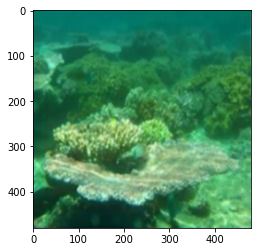

In [ ]:
plt.imshow(dirt[1])

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_scenes/trainB/'
cnt=0
for i in b:
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  clear.append(image)
  cnt=cnt+1

KeyboardInterrupt: ignored

In [ ]:
plt.imshow(clear[1])

## Model Creation

In [ ]:
dirt=np.array(dirt)
clear=np.array(clear)

In [ ]:
np.shape(dirt)

In [ ]:
np.shape(clear)

In [ ]:
input_img = keras.Input(shape=(480, 480, 3))
x=tf.keras.layers.Conv2D(64, (7, 7),strides=(1,1), activation="relu", input_shape=(480, 480, 3),padding='same')(input_img)
x=tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),activation="relu",padding='same')(x)
x=tf.keras.layers.Conv2D(256,(3,3),strides=(2,2),activation="relu",padding='same')(x)

r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(x)

r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)

d=tf.keras.layers.Add()([r,x])

d=tf.keras.layers.Conv2DTranspose(128,(3,3),strides=(2,2),activation="relu",padding='same')(d)
d=tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),activation="relu",padding='same')(d)
d=tf.keras.layers.Conv2D(3,(7,7),strides=(1,1),activation="relu",padding='same')(d)


generator = keras.Model(input_img, d)
generator.compile(optimizer='adam', loss='mse')
generator.summary()

In [ ]:
tf.config.run_functions_eagerly(False)


In [ ]:
generator.fit(dirt, clear, epochs=50, batch_size=20)

In [ ]:
plt.plot(generator.history.history['loss'])

In [ ]:
var = generator.predict(dirt)

7/7 [==============================] - 18s 1s/step


## Prediction

In [ ]:
var = generator.predict(dirt)

NameError: ignored

In [ ]:
def images():
  num = random.random()*200
  n=int(num)
  img = dirt[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb1 = np.dstack((r,g,b))


  img = var[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb2 = np.dstack((r,g,b))
  Hori = np.concatenate((rgb1, rgb2), axis=1)

  cv2_imshow(Hori)

In [ ]:
def disp_images(n):
  for i in range(0,n):
    images()

In [ ]:
disp_images(10)

In [ ]:
np.shape(dirt)

(200, 480, 480, 3)

In [ ]:
np.shape(clear)

(200, 480, 480, 3)

In [ ]:
generator.save('/content/gdrive/MyDrive/sea_model_X.h5')

In [ ]:
generator.save('sea_model_X.h5')

## Re-Training_saved_model

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/sea_model_X_8.0.h5')

In [ ]:
# new_model.fit(dirt, clear, epochs=50, batch_size=20)

In [ ]:
new_model.save('/content/gdrive/MyDrive/sea_model_X_8.0.h5')

In [ ]:
new_model.summary()

In [ ]:
plt.plot(new_model.history.history['loss'])

In [ ]:
var = new_model.predict(dirt)

7/7 [==============================] - 27s 1s/step


In [ ]:
disp_images(3)

# The_Dark_Image_Model

## Load_Data

In [ ]:
dirt=[]
clear=[]

In [ ]:
a=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_dark/trainA'))
a.sort()
print(a)

['264286_00007889.jpg', '264287_00007863.jpg', '264288_00012917.jpg', '264293_00038238.jpg', '264294_00027762.jpg', '264296_n02319095_1106.JPEG', '264298_00035269.jpg', '264303_n02526121_4809.JPEG', '264307_n02317335_6744.JPEG', '264310_n01924916_8467.JPEG', '264311_n02607072_51.JPEG', '264316_n01924916_1597.JPEG', '264318_n02655020_17544.JPEG', '264322_n01917289_4196.JPEG', '264324_n02606052_3580.JPEG', '264326_00020429.jpg', '264328_00004694.jpg', '264332_00012132.jpg', '264343_n01950731_11838.JPEG', '264344_00027786.jpg', '264346_n01917289_4496.JPEG', '264348_n02655020_9849.JPEG', '264362_n02319095_6222.JPEG', '264365_scuba_thanksgiving_520.jpg', '264366_00033180.jpg', '264367_00022286.jpg', '264368_n02607072_398.JPEG', '264369_00011297.jpg', '264373_n02319095_4789.JPEG', '264375_00030607.jpg', '264376_00021655.jpg', '264377_00033442.jpg', '264383_n02526121_667.JPEG', '264384_00020131.jpg', '264385_00010758.jpg', '264387_n02526121_6722.JPEG', '264389_n02319095_1243.JPEG', '264393_n0

In [ ]:
b=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_dark/trainB'))
b.sort()
print(b)

['264286_00007889.jpg', '264287_00007863.jpg', '264288_00012917.jpg', '264293_00038238.jpg', '264294_00027762.jpg', '264296_n02319095_1106.JPEG', '264298_00035269.jpg', '264303_n02526121_4809.JPEG', '264307_n02317335_6744.JPEG', '264310_n01924916_8467.JPEG', '264311_n02607072_51.JPEG', '264316_n01924916_1597.JPEG', '264318_n02655020_17544.JPEG', '264322_n01917289_4196.JPEG', '264324_n02606052_3580.JPEG', '264326_00020429.jpg', '264328_00004694.jpg', '264332_00012132.jpg', '264343_n01950731_11838.JPEG', '264344_00027786.jpg', '264346_n01917289_4496.JPEG', '264348_n02655020_9849.JPEG', '264362_n02319095_6222.JPEG', '264365_scuba_thanksgiving_520.jpg', '264366_00033180.jpg', '264367_00022286.jpg', '264368_n02607072_398.JPEG', '264369_00011297.jpg', '264373_n02319095_4789.JPEG', '264375_00030607.jpg', '264376_00021655.jpg', '264377_00033442.jpg', '264383_n02526121_667.JPEG', '264384_00020131.jpg', '264385_00010758.jpg', '264387_n02526121_6722.JPEG', '264389_n02319095_1243.JPEG', '264393_n0

In [ ]:
len(a)

5550

In [ ]:
a=a[200:400]
b=b[200:400]    

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_dark/trainA/'
cnt=0
for i in a:
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  dirt.append(image)
  cnt=cnt+1

In [ ]:
import matplotlib.pyplot as plt

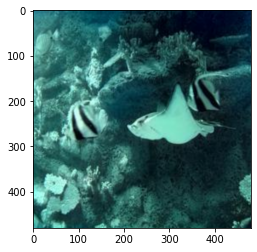

In [ ]:
plt.imshow(dirt[1])

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_dark/trainB/'
cnt=0
for i in b:
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  clear.append(image)
  cnt=cnt+1

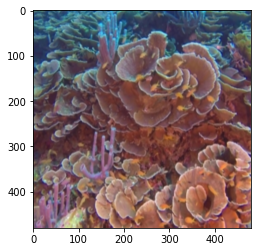

In [ ]:
plt.imshow(clear[0])

In [ ]:
dirt=np.array(dirt)
clear=np.array(clear)

## train_model

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/deep_sea_model_X_1.0.h5')

In [ ]:
new_model.fit(dirt, clear, epochs=50, batch_size=20)

Epoch 1/50
10/10 [==============================] - 21s 2s/step - loss: 772.4934
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 779.3017
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 742.0391
Epoch 4/50
10/10 [==============================] - 19s 2s/step - loss: 759.1383
Epoch 5/50
10/10 [==============================] - 19s 2s/step - loss: 764.8289
Epoch 6/50
10/10 [==============================] - 19s 2s/step - loss: 822.4581
Epoch 7/50
10/10 [==============================] - 19s 2s/step - loss: 754.8186
Epoch 8/50
10/10 [==============================] - 19s 2s/step - loss: 777.4788
Epoch 9/50
10/10 [==============================] - 19s 2s/step - loss: 768.1862
Epoch 10/50
10/10 [==============================] - 19s 2s/step - loss: 809.4648
Epoch 11/50
10/10 [==============================] - 19s 2s/step - loss: 750.9064
Epoch 12/50
10/10 [==============================] - 19s 2s/step - loss: 728.7685
Epoch 13/50
10/10 [======

In [ ]:
new_model.save('/content/gdrive/MyDrive/deep_sea_model_X_2.0.h5')

## Dark_Image_Prediction

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/deep_sea_model_X_4.0.h5')

In [ ]:
var = new_model.predict(dirt)

7/7 [==============================] - 646s 90s/step


In [ ]:
def images():
  num = random.random()*200
  n=int(num)
  img = dirt[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb1 = np.dstack((r,g,b))


  img = var[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb2 = np.dstack((r,g,b))
  Hori = np.concatenate((rgb1, rgb2), axis=1)

  cv2_imshow(Hori)

In [ ]:
def disp_images(n):
  for i in range(0,n):
    images()

In [ ]:
disp_images(10)

# Testing

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

##import images

In [ ]:
dirt=[]
clear=[]

In [ ]:
a=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainA'))
a.sort()
print(a)

['im_f1000_.jpg', 'im_f1001_.jpg', 'im_f1002_.jpg', 'im_f1003_.jpg', 'im_f1004_.jpg', 'im_f1005_.jpg', 'im_f1007_.jpg', 'im_f1009_.jpg', 'im_f100_.jpg', 'im_f1011_.jpg', 'im_f1012_.jpg', 'im_f1013_.jpg', 'im_f1015_.jpg', 'im_f1018_.jpg', 'im_f101_.jpg', 'im_f1022_.jpg', 'im_f1026_.jpg', 'im_f1027_.jpg', 'im_f1029_.jpg', 'im_f1033_.jpg', 'im_f1034_.jpg', 'im_f1035_.jpg', 'im_f1036_.jpg', 'im_f1037_.jpg', 'im_f1038_.jpg', 'im_f103_.jpg', 'im_f1041_.jpg', 'im_f1042_.jpg', 'im_f1043_.jpg', 'im_f1048_.jpg', 'im_f1049_.jpg', 'im_f104_.jpg', 'im_f1050_.jpg', 'im_f1051_.jpg', 'im_f1054_.jpg', 'im_f1056_.jpg', 'im_f1057_.jpg', 'im_f1058_.jpg', 'im_f1059_.jpg', 'im_f1060_.jpg', 'im_f1061_.jpg', 'im_f1062_.jpg', 'im_f1064_.jpg', 'im_f1065_.jpg', 'im_f1069_.jpg', 'im_f1071_.jpg', 'im_f1072_.jpg', 'im_f1079_.jpg', 'im_f107_.jpg', 'im_f1083_.jpg', 'im_f1085_.jpg', 'im_f1087_.jpg', 'im_f108_.jpg', 'im_f1093_.jpg', 'im_f1098_.jpg', 'im_f1099_.jpg', 'im_f109_.jpg', 'im_f10_.jpg', 'im_f1101_.jpg', 'im_f

In [ ]:
b=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainB'))
b.sort()
print(b)

['im_f1000_.jpg', 'im_f1001_.jpg', 'im_f1002_.jpg', 'im_f1003_.jpg', 'im_f1004_.jpg', 'im_f1005_.jpg', 'im_f1007_.jpg', 'im_f1009_.jpg', 'im_f100_.jpg', 'im_f1011_.jpg', 'im_f1012_.jpg', 'im_f1013_.jpg', 'im_f1015_.jpg', 'im_f1018_.jpg', 'im_f101_.jpg', 'im_f1022_.jpg', 'im_f1026_.jpg', 'im_f1027_.jpg', 'im_f1029_.jpg', 'im_f1033_.jpg', 'im_f1034_.jpg', 'im_f1035_.jpg', 'im_f1036_.jpg', 'im_f1037_.jpg', 'im_f1038_.jpg', 'im_f103_.jpg', 'im_f1041_.jpg', 'im_f1042_.jpg', 'im_f1043_.jpg', 'im_f1048_.jpg', 'im_f1049_.jpg', 'im_f104_.jpg', 'im_f1050_.jpg', 'im_f1051_.jpg', 'im_f1054_.jpg', 'im_f1056_.jpg', 'im_f1057_.jpg', 'im_f1058_.jpg', 'im_f1059_.jpg', 'im_f1060_.jpg', 'im_f1061_.jpg', 'im_f1062_.jpg', 'im_f1064_.jpg', 'im_f1065_.jpg', 'im_f1069_.jpg', 'im_f1071_.jpg', 'im_f1072_.jpg', 'im_f1079_.jpg', 'im_f107_.jpg', 'im_f1083_.jpg', 'im_f1085_.jpg', 'im_f1087_.jpg', 'im_f108_.jpg', 'im_f1093_.jpg', 'im_f1098_.jpg', 'im_f1099_.jpg', 'im_f109_.jpg', 'im_f10_.jpg', 'im_f1101_.jpg', 'im_f

In [ ]:
len(a)

2185

In [ ]:
a=a[2000:2100]
b=b[2000:2100]

In [ ]:
path='content/gdrive/MyDrive/Paired/underwater_scenes/trainA'
cnt=0
for i in a:
  image=cv2.imread('/content/gdrive/MyDrive/Paired/underwater_scenes/trainA/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  dirt.append(image)
  cnt=cnt+1

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_scenes/trainB'
cnt=0
for i in b:
  image=cv2.imread('/content/gdrive/MyDrive/Paired/underwater_scenes/trainB/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  clear.append(image)
  cnt=cnt+1

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/sea_model_X_8.0.h5')

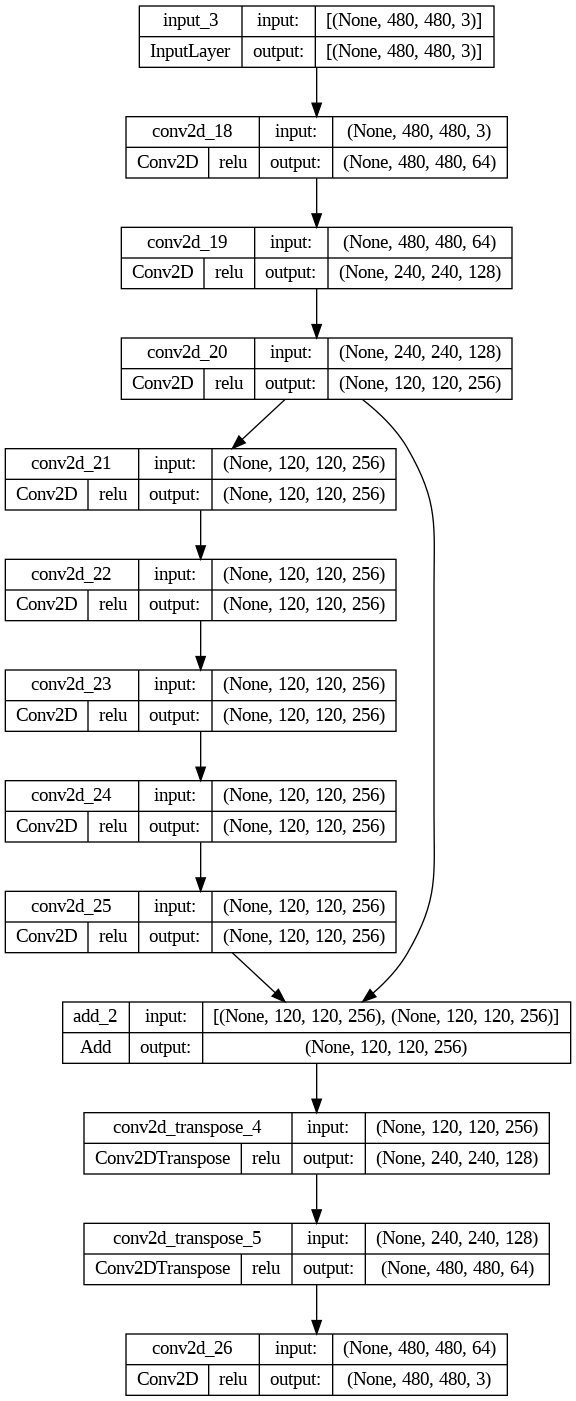

In [ ]:
tf.keras.utils.plot_model(
    new_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    dpi=96,
    show_layer_activations=True,
)

In [ ]:
clear=np.array(clear)
dirt=np.array(dirt)

##predict

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
var = new_model.predict(dirt)

4/4 [==============================] - 6s 2s/step


##Save Images

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
id=0
for i in clear:
  img_rgb = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
  status = cv2.imwrite('/content/gdrive/MyDrive/Output_Sea_images/'+str(id)+'outputExpected.jpg',img_rgb)
  id=id+1
  print(status)

## Histogram Color Distribution

In [ ]:
import cv2
import matplotlib.pyplot as plt
def hist_calc(i):
  imageObj = cv2.imread('/content/gdrive/MyDrive/Output_Sea_images/'+str(i)+'.jpg')
  # to avoid grid lines
  plt.axis("off")
  plt.title("Output Image")
  plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
  plt.show()
    
  # Get RGB data from image
  blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
  red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
  green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
    
  # Separate Histograms for each color
  plt.subplot(3, 1, 1)
  plt.title("histogram of Blue")
  plt.plot(blue_color, color="blue")
    
  plt.subplot(3, 1, 2)
  plt.title("histogram of Green")
  plt.plot(green_color, color="green")
    
  plt.subplot(3, 1, 3)
  plt.title("histogram of Red")
  plt.plot(red_color, color="red")
    
  # for clear view
  plt.tight_layout()
  plt.show()
    
  # combined histogram
  plt.title("Histogram of all RGB Colors")
  plt.plot(blue_color, color="blue")
  plt.plot(green_color, color="green")
  plt.plot(red_color, color="red")
  plt.show()


  imageObj = cv2.imread('/content/gdrive/MyDrive/Output_Sea_images/'+str(i)+'input.jpg')
  # to avoid grid lines
  plt.axis("off")
  plt.title("Input Image")
  plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
  plt.show()
    
  # Get RGB data from image
  blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
  red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
  green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
    
  # Separate Histograms for each color
  plt.subplot(3, 1, 1)
  plt.title("histogram of Blue")
  plt.plot(blue_color, color="blue")
    
  plt.subplot(3, 1, 2)
  plt.title("histogram of Green")
  plt.plot(green_color, color="green")
    
  plt.subplot(3, 1, 3)
  plt.title("histogram of Red")
  plt.plot(red_color, color="red")
    
  # for clear view
  plt.tight_layout()
  plt.show()
    
  # combined histogram
  plt.title("Histogram of all RGB Colors")
  plt.plot(blue_color, color="blue")
  plt.plot(green_color, color="green")
  plt.plot(red_color, color="red")
  plt.show()

In [ ]:
hist_calc(12)

## Display Images

In [ ]:
def images():
  num = random.random()*100
  n=int(num)
  img = dirt[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb1 = np.dstack((r,g,b))


  img = var[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb2 = np.dstack((r,g,b))
  Hori = np.concatenate((rgb1, rgb2), axis=1)

  cv2_imshow(Hori)


In [ ]:
def disp_images(n):
  for i in range(0,n):
    images()

In [ ]:
disp_images(10)

##MSE 


In [ ]:
mse=((clear-var)**2).mean()
mse

202.456

In [ ]:
mse_list=[]

In [ ]:
k=0
for i in range(0,len(var)):
  val=mse=((clear[i]-var[i])**2).mean()
  if(val>88):
    continue
  k=k+1
  # img_rgb = cv2.cvtColor(clear[i], cv2.COLOR_BGR2RGB)
  # status = cv2.imwrite('/content/gdrive/MyDrive/Output_Good/'+str(k)+'expected.jpg',img_rgb)
  # img_rgb = cv2.cvtColor(var[i], cv2.COLOR_BGR2RGB)
  # status = cv2.imwrite('/content/gdrive/MyDrive/Output_Good/'+str(k)+'output.jpg',img_rgb)
  # img_rgb = cv2.cvtColor(dirt[i], cv2.COLOR_BGR2RGB)
  # status = cv2.imwrite('/content/gdrive/MyDrive/Output_Good/'+str(k)+'input.jpg',img_rgb)
  mse_list.append(val)

In [ ]:
len(mse_list)

12

68.83856662114461

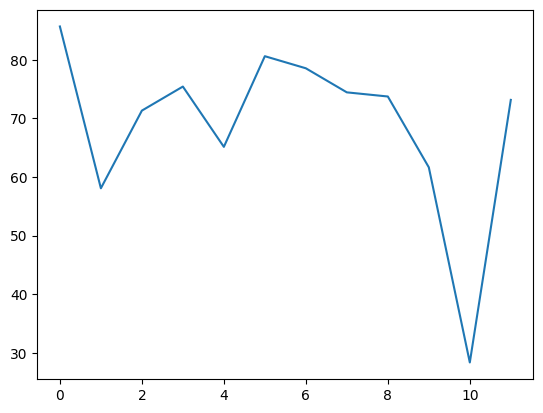

In [ ]:
plt.plot(mse_list)
sum(mse_list)/len(mse_list)

## PSNR Score

In [ ]:
from skimage import io
from skimage.metrics import structural_similarity as ssim

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 256.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
def main(original,compressed):
     value = PSNR(original, compressed)
     return value

In [ ]:
comp=cv2.imread('/content/gdrive/MyDrive/Output_Sea_images/0.jpg')
orig=cv2.imread('/content/gdrive/MyDrive/Output_Sea_images/0input.jpg')
main(orig,comp)

27.62257435327175

In [ ]:
"15expected.jpg"[2:10]

'expected'

In [ ]:
psnr_list=[]

In [ ]:
for i in range(1,11):
  comp=io.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'output.jpg')
  orig=io.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')
  psnr_list.append(main(orig,comp))

In [ ]:
sum(psnr_list)/len(psnr_list)

31.370086182028956

#SSIM

In [ ]:
ssim_list=[]

In [ ]:
im=cv2.imread('/content/gdrive/MyDrive/Output_Good/1expected.jpg')

In [ ]:
im.shape

(480, 480, 3)

In [ ]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def ssim(img1,img2):
  before = img1
  after = img2
  before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
  after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
  (score, diff) = structural_similarity(before_gray, after_gray, full=True)
  return score

In [ ]:
ssim_list=[]

In [ ]:
for i in range(1,11):
  comp=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'output.jpg')
  orig=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')
  inpt=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'input.jpg')
  ssim_list.append(ssim(orig,comp))

In [ ]:
sum(ssim_list)/len(ssim_list)

0.9201877722113704

#UCIQE_UIQM

In [ ]:
!unzip "/content/drive/MyDrive/eval_data/euvp_test/deep-sesr.zip"

In [ ]:
import numpy as np
import math
import sys
from skimage import io, color, filters
import os
import math

def nmetrics(a):
    rgb = a
    lab = color.rgb2lab(a)
    gray = color.rgb2gray(a)
    # UCIQE
    c1 = 0.4680
    c2 = 0.2745
    c3 = 0.2576
    l = lab[:,:,0]

    #1st term
    chroma = (lab[:,:,1]**2 + lab[:,:,2]**2)**0.5
    uc = np.mean(chroma)
    sc = (np.mean((chroma - uc)**2))**0.5

    #2nd term
    top = np.int(np.round(0.01*l.shape[0]*l.shape[1]))
    sl = np.sort(l,axis=None)
    isl = sl[::-1]
    conl = np.mean(isl[:top])-np.mean(sl[:top])

    #3rd term
    satur = []
    chroma1 = chroma.flatten()
    l1 = l.flatten()
    for i in range(len(l1)):
        if chroma1[i] == 0: satur.append(0)
        elif l1[i] == 0: satur.append(0)
        else: satur.append(chroma1[i] / l1[i])

    us = np.mean(satur)

    uciqe = c1 * sc + c2 * conl + c3 * us

    # UIQM
    p1 = 0.0282
    p2 = 0.2953
    p3 = 3.5753

    #1st term UICM
    rg = rgb[:,:,0] - rgb[:,:,1]
    yb = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]
    rgl = np.sort(rg,axis=None)
    ybl = np.sort(yb,axis=None)
    al1 = 0.1
    al2 = 0.1
    T1 = np.int(al1 * len(rgl))
    T2 = np.int(al2 * len(rgl))
    rgl_tr = rgl[T1:-T2]
    ybl_tr = ybl[T1:-T2]

    urg = np.mean(rgl_tr)
    s2rg = np.mean((rgl_tr - urg) ** 2)
    uyb = np.mean(ybl_tr)
    s2yb = np.mean((ybl_tr- uyb) ** 2)

    uicm =-0.0268 * np.sqrt(urg**2 + uyb**2) + 0.1586 * np.sqrt(s2rg + s2yb)

    #2nd term UISM (k1k2=8x8)
    Rsobel = rgb[:,:,0] * filters.sobel(rgb[:,:,0])
    Gsobel = rgb[:,:,1] * filters.sobel(rgb[:,:,1])
    Bsobel = rgb[:,:,2] * filters.sobel(rgb[:,:,2])

    Rsobel=np.round(Rsobel).astype(np.uint8)
    Gsobel=np.round(Gsobel).astype(np.uint8)
    Bsobel=np.round(Bsobel).astype(np.uint8)

    Reme = eme(Rsobel)
    Geme = eme(Gsobel)
    Beme = eme(Bsobel)

    uism = 0.299 * Reme + 0.587 * Geme + 0.114 * Beme

    #3rd term UIConM
    uiconm = logamee(gray)

    uiqm = p1 * uicm + p2 * uism + p3 * uiconm
    return uiqm,uciqe

def eme(ch,blocksize=8):

    num_x = math.ceil(ch.shape[0] / blocksize)
    num_y = math.ceil(ch.shape[1] / blocksize)
    
    eme = 0
    w = 2. / (num_x * num_y)
    for i in range(num_x):

        xlb = i * blocksize
        if i < num_x - 1:
            xrb = (i+1) * blocksize
        else:
            xrb = ch.shape[0]

        for j in range(num_y):

            ylb = j * blocksize
            if j < num_y - 1:
                yrb = (j+1) * blocksize
            else:
                yrb = ch.shape[1]
            
            block = ch[xlb:xrb,ylb:yrb]

            blockmin = np.float(np.min(block))
            blockmax = np.float(np.max(block))

            # # old version
            # if blockmin == 0.0: eme += 0
            # elif blockmax == 0.0: eme += 0
            # else: eme += w * math.log(blockmax / blockmin)

            # new version
            if blockmin == 0: blockmin+=1
            if blockmax == 0: blockmax+=1
            eme += w * math.log(blockmax / blockmin)
    return eme

def plipsum(i,j,gamma=1026):
    return i + j - i * j / gamma

def plipsub(i,j,k=1026):
    return k * (i - j) / (k - j)

def plipmult(c,j,gamma=1026):
    return gamma - gamma * (1 - j / gamma)**c

def logamee(ch,blocksize=8):

    num_x = math.ceil(ch.shape[0] / blocksize)
    num_y = math.ceil(ch.shape[1] / blocksize)
    
    s = 0
    w = 1. / (num_x * num_y)
    for i in range(num_x):

        xlb = i * blocksize
        if i < num_x - 1:
            xrb = (i+1) * blocksize
        else:
            xrb = ch.shape[0]

        for j in range(num_y):

            ylb = j * blocksize
            if j < num_y - 1:
                yrb = (j+1) * blocksize
            else:
                yrb = ch.shape[1]
            
            block = ch[xlb:xrb,ylb:yrb]
            blockmin = np.float(np.min(block))
            blockmax = np.float(np.max(block))

            top = plipsub(blockmax,blockmin)
            bottom = plipsum(blockmax,blockmin)

            m = top/bottom
            if m ==0.:
                s+=0
            else:
                s += (m) * np.log(m)

    return plipmult(w,s)


In [ ]:
lst=[]

In [ ]:
for i in range(1,11):
  comp=io.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'output.jpg')
  lst.append(nmetrics(comp))

<ipython-input-89-b0f1b076d638>:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top = np.int(np.round(0.01*l.shape[0]*l.shape[1]))
<ipython-input-89-b0f1b076d638>:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in

In [ ]:
sum=0
for i in lst:
  sum+=i[0]

In [ ]:
lst[0]

(0.06500035055715281, 26.124663815828914)

In [ ]:
sum/len(lst)

0.2701469601859058

## MSE

In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [ ]:
ims=os.listdir('/content/drive/MyDrive/Output_Sea_images/')

In [ ]:
for i in range(0,100):
  input=cv2.imread('/content/drive/MyDrive/Output_Sea_images/'+str(i)+'input.jpg')
  output=cv2.imread('/content/drive/MyDrive/Output_Sea_images/'+str(i)+'.jpg')
  expected=cv2.imread('/content/drive/MyDrive/Output_Sea_images/'+str(i)+'outputExpected.jpg')
  print(mse(expected,output))

#CLAHE

In [ ]:
import cv2

In [ ]:
def clahe(colorimage):
  clahe_model = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  colorimage_b = clahe_model.apply(colorimage[:,:,0])
  colorimage_g = clahe_model.apply(colorimage[:,:,1])
  colorimage_r = clahe_model.apply(colorimage[:,:,2])
  colorimage_clahe = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
  return colorimage_clahe

In [ ]:
for i in range(1,11):
  im= cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'input.jpg')
  exp=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')
  new_im=clahe(im)
  # cv2.imwrite('/content/gdrive/MyDrive/CLAHE/'+str(i)+'output.jpg',new_im)
  # cv2.imwrite('/content/gdrive/MyDrive/CLAHE/'+str(i)+'input.jpg',im)
  # cv2.imwrite('/content/gdrive/MyDrive/CLAHE/'+str(i)+'expected.jpg',exp)
  Hori = np.concatenate((im, new_im), axis=1)
  cv2_imshow(Hori)


#MSRCR

In [ ]:
import numpy as np
import cv2
from skimage import img_as_float64
from google.colab.patches import cv2_imshow
def singleScale(img,sigma):
    ssr = np.log10(img) - np.log10(cv2.GaussianBlur(img,(0,0),sigma))
    return ssr

def multiScale(img,sigmas : list):
    retinex = np.zeros_like(img)
    for s in sigmas:
        retinex += singleScale(img, s)

    msr = retinex/len(sigmas)
    return msr

def crf(img, alpha, beta):
    img_sum = np.sum(img,axis=2,keepdims=True)

    color_rest = beta * (np.log10(alpha*img) - np.log10(img_sum))
    return color_rest


def MSRCR(img, sigmas :list, alpha, beta, G, b):
    img = img_as_float64(img)+1

    img_msr = multiScale(img, sigmas)    
    img_color = crf(img, alpha, beta)    
    img_msrcr = G * (img_msr*img_color + b)
    
    
    for i in range(img_msrcr.shape[2]):
        img_msrcr[:, :, i] = (img_msrcr[:, :, i] - np.min(img_msrcr[:, :, i])) / \
                                (np.max(img_msrcr[:, :, i]) - np.min(img_msrcr[:, :, i])) * \
                                255

    img_msrcr = np.uint8(np.minimum(np.maximum(img_msrcr, 0), 255))
    
    return img_msrcr

In [ ]:
SIGMA_LIST = [15, 80, 250]
ALPHA = 125.0
BETA = 46.0
G = 5.0
OFFSET = 25.0 

In [ ]:
msrcr_img = MSRCR(image,SIGMA_LIST,ALPHA,BETA,G,OFFSET)


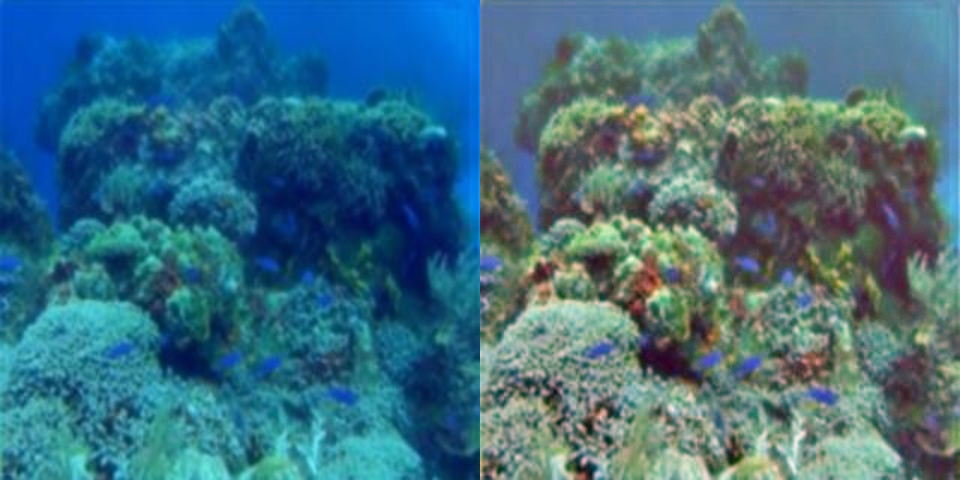

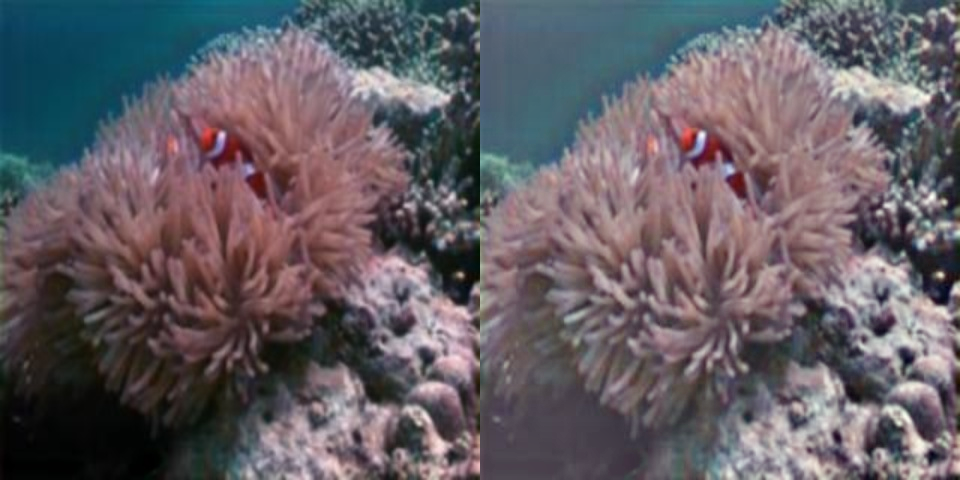

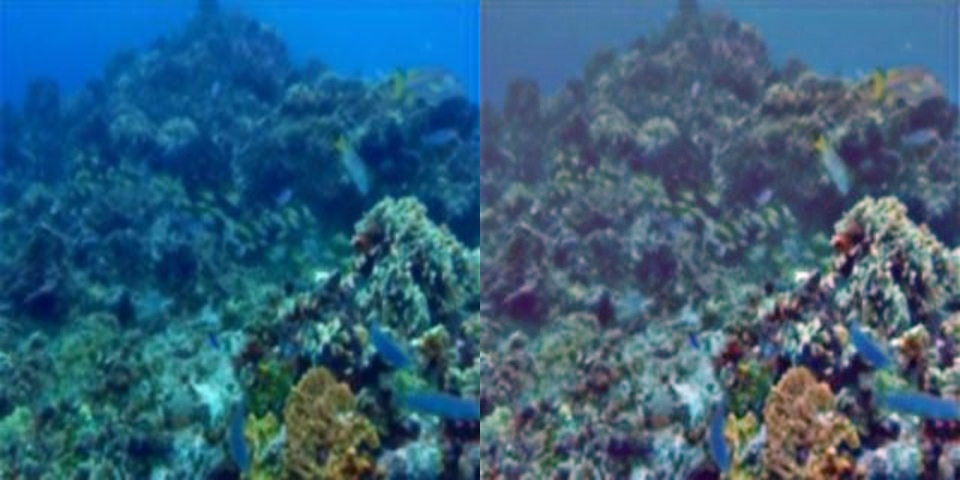

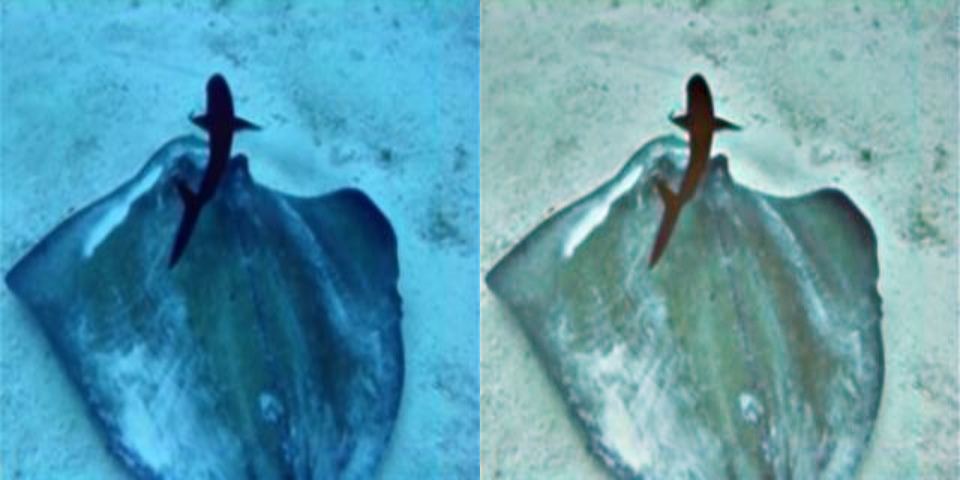

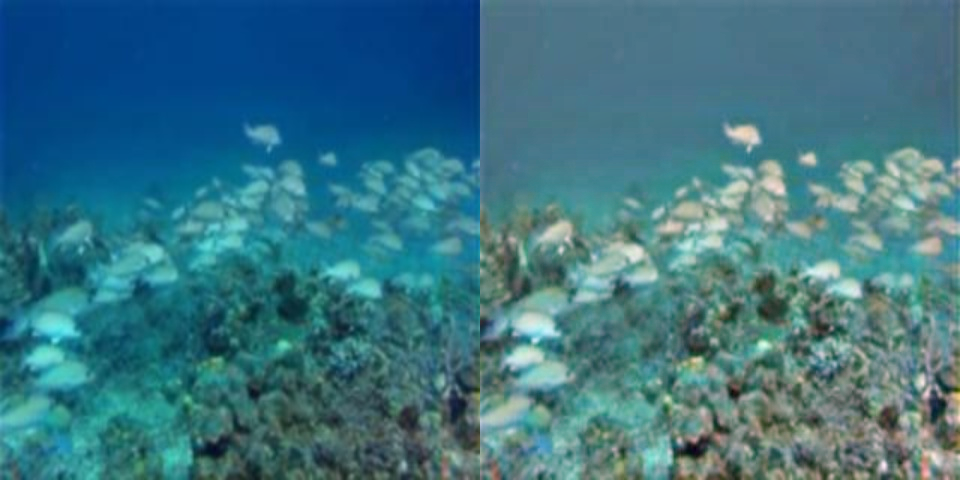

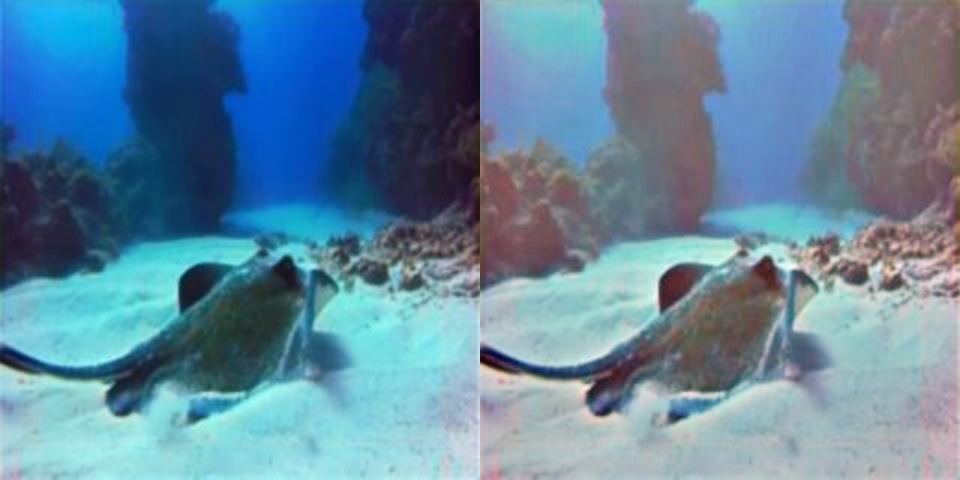

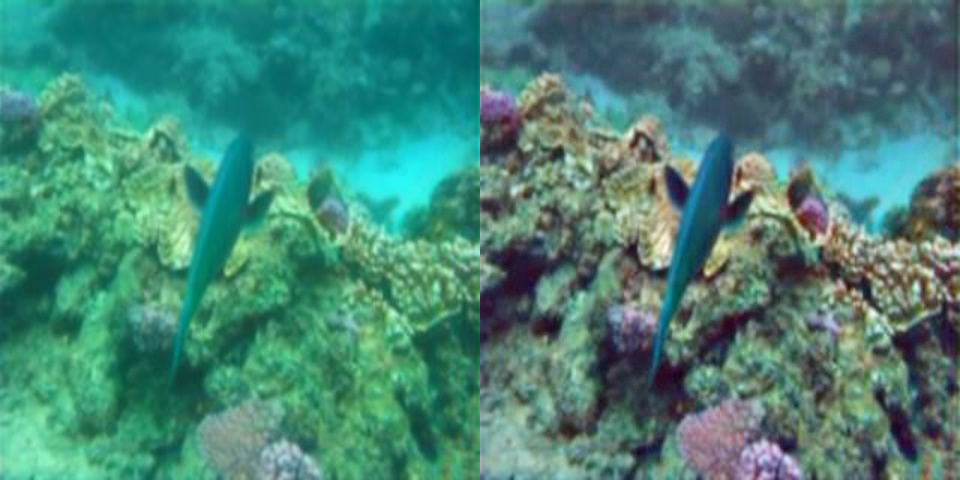

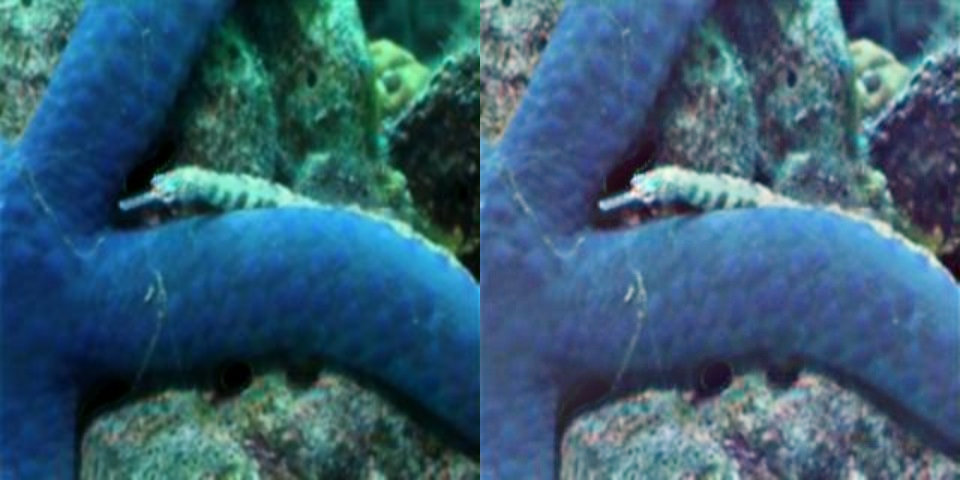

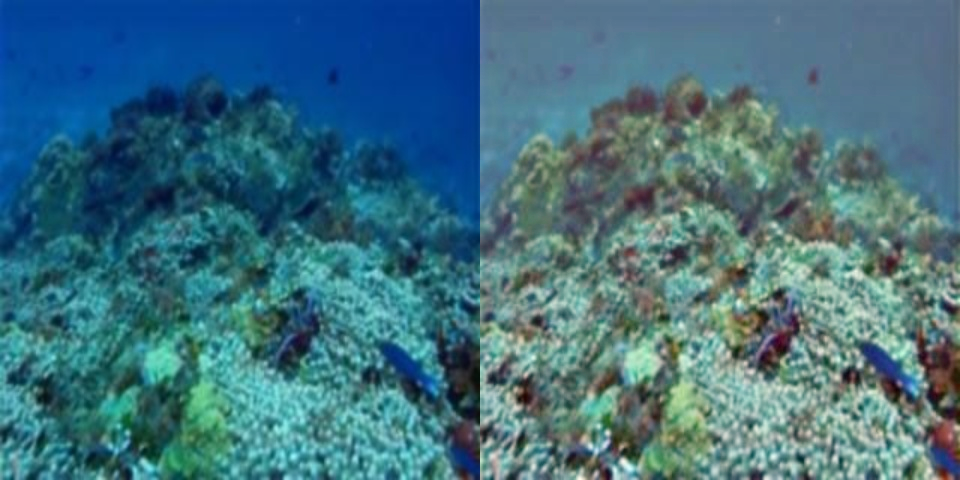

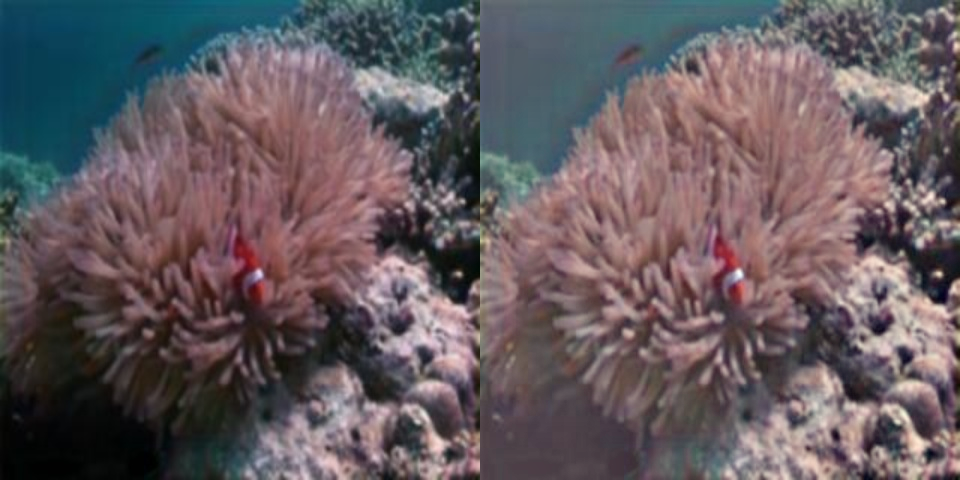

In [ ]:
for i in range(1,11):
  im= cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'input.jpg')
  exp=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')
  new_im=MSRCR(im,SIGMA_LIST,ALPHA,BETA,G,OFFSET)
  cv2.imwrite('/content/gdrive/MyDrive/MSRCR/'+str(i)+'output.jpg',new_im)
  cv2.imwrite('/content/gdrive/MyDrive/MSRCR/'+str(i)+'input.jpg',im)
  cv2.imwrite('/content/gdrive/MyDrive/MSRCR/'+str(i)+'expected.jpg',exp)
  Hori = np.concatenate((im, new_im), axis=1)
  cv2_imshow(Hori)

#BPDFHE

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import time
from PIL import Image
import skfuzzy as fuzz
import math
import timeit

    
def bpdfhe(image):
    
    opimg = np.zeros_like(image)
 
    array1 = np.zeros(256*4+1, dtype = int)
    hist = array1[1:257]
    deltahist = array1[257:513]
    delta2hist = array1[513:769]
    histmax = array1[769:]
    

    hist, bin_edges = np.histogram(image, bins=256)

    x_qual = np.arange(0, 11, 1)

    membership= fuzz.trimf(x_qual, [0, 5, 10])

    fuzzyhist = np.zeros((np.size(hist)+np.size(membership)-1,1)).T;


    for counter in range(np.size(membership)):

        fuzzyhist = fuzzyhist + membership[counter]*np.concatenate((np.zeros(counter+1-1), hist, np.zeros(np.size(membership)-counter-1)),axis=0)

    fuzzyhist = fuzzyhist.T[math.ceil(np.size(membership)/2):-math.floor(np.size(membership)/2)+1]

    for i in range(255):
        deltahist[i] = (fuzzyhist[i+1]-fuzzyhist[i-1])/2
        delta2hist[i] = fuzzyhist[i+1]-2*fuzzyhist[i]+fuzzyhist[i-1]
    for i in range(255):
        if (deltahist[i+1]*deltahist[i-1]<0 and delta2hist[i]<0):
            histmax[i] = 1

    parts = np.where(histmax)[0]
    x = np.append(0,parts)
    x = np.append(x,255)

    span = np.zeros(x.shape[0], dtype = float) 
    M = np.zeros(x.shape[0], dtype = float) 
    factor = np.zeros(x.shape[0], dtype = float) 
    rang = np.zeros(x.shape[0], dtype = float) 
    start = np.zeros(x.shape[0], dtype = float) 

    Msum = np.cumsum(hist)

    for i in range(x.shape[0]):
        span[i-1]   = x[i] - x[i-1]
        if (span[i-1]<0):
            span[i-1]=1
        M[i-1] = Msum[x[i]]-Msum[x[i-1]]
        if (M[i-1]<0):
            M[i-1]=1
        factor[i-1] = span[i-1]*math.log10(M[i-1])

    factorsum = sum(factor)

    for i in range(x.shape[0]):    
        rang[i-1] = 255*factor[i-1]/factorsum

    start = np.cumsum(rang)
    start = np.append(0,start)
    start = start.astype(int)

    opimg = np.zeros_like(image)
    img2 = np.zeros_like(image)
    small = np.amin(image)
    big = np.amax(image)

    y = np.zeros(hist.shape, dtype = float) 
    for i in range(start.shape[0]):

        y[start[i-1]:start[i]] = start[i-1]+rang[i-1]/M[i-1]*np.cumsum(hist[start[i-1]:start[i]])


    opimg = y[image]
    
    return opimg

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import time
from PIL import Image
import skfuzzy as fuzz
import math
import timeit
    
t0 = time.time()*1000;

image = Image.open("/content/gdrive/MyDrive/Output_Good/10input.jpg")
image = np.array(image)
    
opimg = bpdfhe(image)
    
mean1 = image.mean()
mean0 = opimg.mean()
img2  = mean1/mean0*opimg

t1 = time.time()*1000;
print("%.6f milli seconds" % (t1 - t0))

39.049561 milli seconds


In [ ]:
img = opimg
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]
rgb1 = np.dstack((r,g,b))

In [ ]:
for i in range(1,11):
  im= cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'input.jpg')
  exp=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')

  image = im
  image = np.array(image)
  opimg = bpdfhe(image)
  img = opimg
  r=img[:,:,0]
  g=img[:,:,1]
  b=img[:,:,2]
  rgb1 = np.dstack((r,g,b))

  cv2.imwrite('/content/gdrive/MyDrive/BPDFHE/'+str(i)+'output.jpg',rgb1)
  cv2.imwrite('/content/gdrive/MyDrive/BPDFHE/'+str(i)+'input.jpg',im)
  cv2.imwrite('/content/gdrive/MyDrive/BPDFHE/'+str(i)+'expected.jpg',exp)
  Hori = np.concatenate((im, rgb1), axis=1)
  cv2_imshow(Hori)

#Metrics Comparison

In [ ]:
ssim_clahe=[]
ssim_msrcr=[]
ssim_bpdfhe=[]
ssim_proposed=[]

In [ ]:
psnr_clahe=[]
psnr_msrcr=[]
psnr_bpdfhe=[]
psnr_proposed=[]

In [ ]:
mse_clahe=[]
mse_msrcr=[]
mse_bpdfhe=[]
mse_proposed=[]

In [ ]:
def mse(a,b):
  return ((np.asarray(a)-np.asarray(b))**2).mean()


In [ ]:
for i in range(1,11):
  orig=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'expected.jpg')
  img_clahe=cv2.imread('/content/gdrive/MyDrive/CLAHE/'+str(i)+'output.jpg')
  img_msrcr=cv2.imread('/content/gdrive/MyDrive/MSRCR/'+str(i)+'output.jpg')
  img_bpdfhe=cv2.imread('/content/gdrive/MyDrive/BPDFHE/'+str(i)+'output.jpg')
  img_proposed=cv2.imread('/content/gdrive/MyDrive/Output_Good/'+str(i)+'output.jpg')
  print(i)
  ssim_clahe.append(ssim(orig,img_clahe))
  ssim_msrcr.append(ssim(orig,img_msrcr))
  ssim_bpdfhe.append(ssim(orig,img_bpdfhe))
  ssim_proposed.append(ssim(orig,img_proposed))

  psnr_clahe.append(main(orig,img_clahe))
  psnr_msrcr.append(main(orig,img_msrcr))
  psnr_bpdfhe.append(main(orig,img_bpdfhe))
  psnr_proposed.append(main(orig,img_proposed))

  mse_clahe.append(mse(orig,img_clahe))
  mse_msrcr.append(mse(orig,img_msrcr))
  mse_bpdfhe.append(mse(orig,img_bpdfhe))
  mse_proposed.append(mse(orig,img_proposed))

1
2
3
4
5
6
7
8
9
10


##SSIM VLAUES

In [ ]:
ssim_clahe

[0.714651028873811,
 0.6483724388367614,
 0.7254792550190492,
 0.6970917748849208,
 0.7783156231977253,
 0.7550606983945648,
 0.7630238596663615,
 0.6661175697201145,
 0.7675680819038443,
 0.6610694647171883]

In [ ]:
ssim_msrcr

[0.7645040922664977,
 0.7444379138353175,
 0.8407518509427173,
 0.8036562461006247,
 0.8088284588854686,
 0.7674895344299599,
 0.897912761283711,
 0.7418982378537524,
 0.7766676267022542,
 0.7624486549397943]

In [ ]:
ssim_bpdfhe

[0.8291449544634804,
 0.8857083411614436,
 0.8386048323393795,
 0.8662439766733181,
 0.8837722579156578,
 0.9047980816706402,
 0.8697390425897009,
 0.8686418413422318,
 0.8368194159554687,
 0.8975116046045749]

In [ ]:
ssim_proposed

[0.9024914561643425,
 0.9261309213002605,
 0.9111007612215121,
 0.8951905875483287,
 0.9406967200081217,
 0.9247155029257086,
 0.9295146259540443,
 0.9177385020627995,
 0.9257379872045643,
 0.9285606577240217]

##PSNR VALUES

In [ ]:
psnr_clahe

[28.17628816992206,
 27.98985058022528,
 28.163671430594654,
 28.307574675191614,
 28.498114626126906,
 28.32753287080279,
 28.115213423966612,
 28.069692379204202,
 28.280853291140417,
 28.00039501216496]

In [ ]:
psnr_msrcr

[27.81684627160892,
 27.820109328310796,
 27.86469524685692,
 27.8961571569933,
 28.11361850998643,
 27.997705262576513,
 28.51076819221334,
 27.654788065191273,
 27.80676777950367,
 27.833441573119376]

In [ ]:
psnr_bpdfhe

[28.20692969425997,
 28.33560114928904,
 29.208479952152558,
 27.631562615416723,
 28.24480991884346,
 27.665484820021394,
 28.108098222383312,
 27.743936036790462,
 28.506226378782245,
 28.011324203407565]

In [ ]:
psnr_proposed

[31.0094011119157,
 31.682725645811516,
 31.409273124142327,
 31.489317133175057,
 31.862845960820852,
 30.809490426033413,
 31.07601151979199,
 31.214592495050617,
 31.680441043269635,
 31.63696533675317]

##MSE VALUES

In [ ]:
mse_clahe

[99.73580873842593,
 104.11058159722222,
 100.02597366898148,
 96.76592737268518,
 92.61225694444444,
 96.32225549768519,
 101.14830005787037,
 102.21407262731482,
 97.36314670138889,
 103.85811342592592]

In [ ]:
mse_msrcr

[108.34161458333334,
 108.26024305555555,
 107.15449797453704,
 106.38103587962964,
 101.18545283564815,
 103.92245659722222,
 92.34281539351852,
 112.46078848379629,
 108.59333043981482,
 107.92840856481482]

In [ ]:
mse_bpdfhe

[99.0346021412037,
 96.14347511574074,
 78.63790509259259,
 113.06382378472222,
 98.17455439814815,
 112.18413628472223,
 101.31415075231482,
 110.17582899305556,
 92.43943721064815,
 103.59707899305556]

In [ ]:
mse_proposed

[51.94452980324074,
 44.484361979166664,
 47.37537037037037,
 46.510201099537035,
 42.67714265046296,
 54.391481481481485,
 51.15390335648148,
 49.54737847222222,
 44.50776909722222,
 44.955558449074076]

In [ ]:
import pandas as pd

In [ ]:
ssim_metrics=pd.DataFrame(
    {
        'CLAHE':ssim_clahe,
        'MSRCR':ssim_msrcr,
        'BPDFHE':ssim_bpdfhe,
        'PROPOSED':ssim_proposed
    }
)

In [ ]:
ssim_metrics

CLAHE     MSRCR    BPDFHE  PROPOSED
0  0.714651  0.764504  0.829145  0.902491
1  0.648372  0.744438  0.885708  0.926131
2  0.725479  0.840752  0.838605  0.911101
3  0.697092  0.803656  0.866244  0.895191
4  0.778316  0.808828  0.883772  0.940697
5  0.755061  0.767490  0.904798  0.924716
6  0.763024  0.897913  0.869739  0.929515
7  0.666118  0.741898  0.868642  0.917739
8  0.767568  0.776668  0.836819  0.925738
9  0.661069  0.762449  0.897512  0.928561

In [ ]:
psnr_metrics=pd.DataFrame(
    {
        'CLAHE':psnr_clahe,
        'MSRCR':psnr_msrcr,
        'BPDFHE':psnr_bpdfhe,
        'PROPOSED':psnr_proposed
    }
)

In [ ]:
psnr_metrics

CLAHE      MSRCR     BPDFHE   PROPOSED
0  28.176288  27.816846  28.206930  31.009401
1  27.989851  27.820109  28.335601  31.682726
2  28.163671  27.864695  29.208480  31.409273
3  28.307575  27.896157  27.631563  31.489317
4  28.498115  28.113619  28.244810  31.862846
5  28.327533  27.997705  27.665485  30.809490
6  28.115213  28.510768  28.108098  31.076012
7  28.069692  27.654788  27.743936  31.214592
8  28.280853  27.806768  28.506226  31.680441
9  28.000395  27.833442  28.011324  31.636965

In [ ]:
mse_metrics=pd.DataFrame(
    {
        'CLAHE':mse_clahe,
        'MSRCR':mse_msrcr,
        'BPDFHE':mse_bpdfhe,
        'PROPOSED':mse_proposed
    }
)

In [ ]:
mse_metrics

CLAHE       MSRCR      BPDFHE   PROPOSED
0   99.735809  108.341615   99.034602  51.944530
1  104.110582  108.260243   96.143475  44.484362
2  100.025974  107.154498   78.637905  47.375370
3   96.765927  106.381036  113.063824  46.510201
4   92.612257  101.185453   98.174554  42.677143
5   96.322255  103.922457  112.184136  54.391481
6  101.148300   92.342815  101.314151  51.153903
7  102.214073  112.460788  110.175829  49.547378
8   97.363147  108.593330   92.439437  44.507769
9  103.858113  107.928409  103.597079  44.955558